In [ ]:
import nrrd
import pickle
import numpy as np
from pathlib import Path
from tensorflow import keras
from matplotlib import pyplot as plt

from sklearn.metrics import classification_report

# Calculation of dice scores and classification report for model segmentation performance 

## DICE score

Dice-Sorensen Coefficient where $|X|$ and $|Y|$ are the number of elements in the set and $|X \cap Y|$ are the number of intersecting elements. 

$ DSC = \frac{2|X \cap Y |}{|X| + |Y|}$

In [11]:
x = np.array([1, 0, 1, 1, 1])
y = np.array([0, 0, 1, 0, 1])

def dice(x, y):
    x = x.flatten()
    y = y.flatten()
    intersection = sum(x == y)
    DSC = 2*intersection/(len(x) + len(y))
    return DSC

def report(x, y):
    return classification_report(x.flatten(), y.flatten())

def make_mask(vol, proba=0.5):
    mask = np.zeros_like(vol)
    mask[vol > proba] = 1
    return mask

dice(x, y)

np.float64(0.6)

# Test on validation data from T1 model and sequences.

In [3]:
model = keras.models.load_model("../models/models/T1.keras")

2025-07-28 13:06:55.871467: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1
2025-07-28 13:06:55.871525: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 8.00 GB
2025-07-28 13:06:55.871533: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 2.67 GB
I0000 00:00:1753700815.871849 15081532 pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
I0000 00:00:1753700815.871896 15081532 pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)
/Users/jgray/miniforge3/envs/mri/lib/python3.11/site-packages/keras/src/trainers/trainer.py:212: UserWarning: Model doesn't support `jit_compile=True`. Proceeding with `jit_compile=False`.
  warnings.warn(


In [4]:
with open("../unet_training/Dataset001_T1/T1.pkl", "+rb") as t1:
    T1_data = pickle.load(t1)

In [5]:
t1_val = T1_data["seq_val"]
t1_test = T1_data["seq_test"]

In [6]:
pred_val = model.predict(t1_val)
pred_test = model.predict(t1_test)

2025-07-28 13:06:57.280838: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 2s/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 1s/step


In [7]:
preds = np.concat([pred_val, pred_test])
labs = np.concat([T1_data["seg_val"], T1_data["seg_test"]])

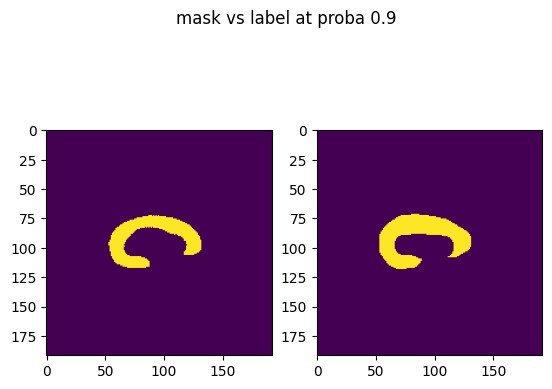

In [8]:

mask = make_mask(vol=preds, proba = 0.9)
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle(f"mask vs label at proba {0.9}")
ax1.imshow(mask[6])
ax2.imshow(labs[6])
plt.show()

In [12]:
print(f"Dice score of T1 segmentation model = {dice(mask, labs):.3f}")
print(report(mask, labs))

Dice score of T1 segmentation model = 0.993
              precision    recall  f1-score   support

         0.0       1.00      0.99      1.00   6622935
         1.0       0.76      0.92      0.83    123177

    accuracy                           0.99   6746112
   macro avg       0.88      0.96      0.91   6746112
weighted avg       0.99      0.99      0.99   6746112



# Test on validation data from T2 model and sequences.

In [13]:
model = keras.models.load_model("../models/models/T2.keras")

/Users/jgray/miniforge3/envs/mri/lib/python3.11/site-packages/keras/src/trainers/trainer.py:212: UserWarning: Model doesn't support `jit_compile=True`. Proceeding with `jit_compile=False`.
  warnings.warn(


In [14]:
with open("../unet_training/Dataset002_T2/T2.pkl", "+rb") as t2:
    T2_data = pickle.load(t2)

t2_val = T2_data["seq_val"]
t2_test = T2_data["seq_test"]
pred_val = model.predict(t2_val)
pred_test = model.predict(t2_test)
preds = np.concat([pred_val, pred_test])
labs = np.concat([T2_data["seg_val"], T2_data["seg_test"]])

7/7 ━━━━━━━━━━━━━━━━━━━━ 27s 4s/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 24s 3s/step


In [1]:
mask = make_mask(vol=preds, proba = 0.2)
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle(f"mask vs label at proba {0.2}")
ax1.imshow(mask[12])
ax2.imshow(labs[12])
plt.show()
print(f"Dice score of T2 segmentation model = {dice(mask, labs):.3f}")
print(report(mask, labs))

NameError: name 'make_mask' is not defined

In [ ]:
del T1_data
del T2_data

## Test on validation data from T2star model and sequences.

In [19]:
model = keras.models.load_model("../models/models/T2star.keras")

/Users/jgray/miniforge3/envs/mri/lib/python3.11/site-packages/keras/src/trainers/trainer.py:212: UserWarning: Model doesn't support `jit_compile=True`. Proceeding with `jit_compile=False`.
  warnings.warn(


In [20]:
with open("../unet_training/Dataset003_T2star/T2star.pkl", "+rb") as t2star:
    T2star_data = pickle.load(t2star)

t2st_val = T2star_data["seq_val"]
t2st_test = T2star_data["seq_test"]
pred_val = model.predict(t2st_val)
pred_test = model.predict(t2st_test)
preds = np.concat([pred_val, pred_test])
labs = np.concat([T2star_data["seg_val"], T2star_data["seg_test"]])

6/6 ━━━━━━━━━━━━━━━━━━━━ 7s 1s/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 6s 1s/step


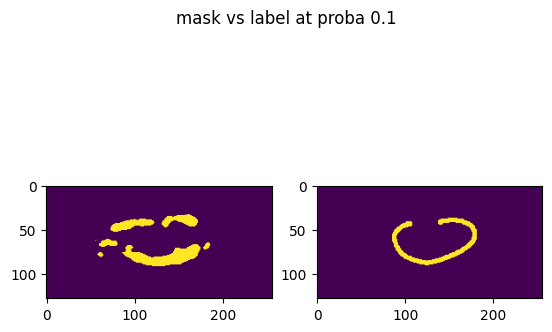

Dice score of T2star segmentation model = 0.982
              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99  10878665
         1.0       0.71      0.41      0.52    262455

    accuracy                           0.98  11141120
   macro avg       0.85      0.70      0.75  11141120
weighted avg       0.98      0.98      0.98  11141120



In [41]:
mask = make_mask(vol=preds, proba = 0.1)
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle(f"mask vs label at proba {0.1}")
ax1.imshow(mask[20])
ax2.imshow(labs[20])
plt.show()
print(f"Dice score of T2star segmentation model = {dice(mask, labs):.3f}")
print(report(mask, labs))

In [42]:
del T2star_data

## Test on validation data from dwi model and sequences.

In [43]:
model = keras.models.load_model("../models/models/ASL.keras")

/Users/jgray/miniforge3/envs/mri/lib/python3.11/site-packages/keras/src/trainers/trainer.py:212: UserWarning: Model doesn't support `jit_compile=True`. Proceeding with `jit_compile=False`.
  warnings.warn(


In [44]:
with open("../unet_training/Dataset004_ASL/ASL.pkl", "+rb") as asl:
    asl_data = pickle.load(asl)

asl_val = asl_data["seq_val"]
asl_test = asl_data["seq_test"]
pred_val = model.predict(asl_val)
pred_test = model.predict(asl_test)
preds = np.concat([pred_val, pred_test])
labs = np.concat([asl_data["seg_val"], asl_data["seg_test"]])

7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 569ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 671ms/step


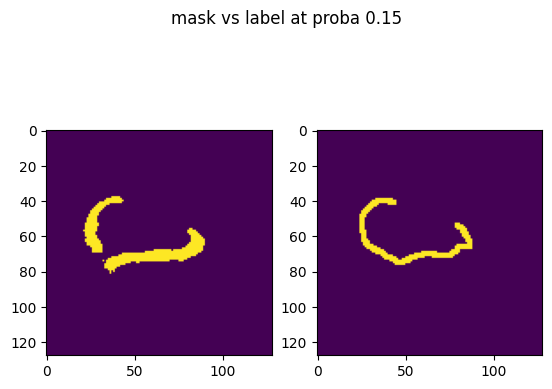

Dice score of ASL segmentation model = 0.992
              precision    recall  f1-score   support

         0.0       0.99      1.00      1.00   7232814
         1.0       0.75      0.55      0.63     90834

    accuracy                           0.99   7323648
   macro avg       0.87      0.77      0.81   7323648
weighted avg       0.99      0.99      0.99   7323648



In [49]:
mask = make_mask(vol=preds, proba = 0.15)
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle(f"mask vs label at proba {0.15}")
ax1.imshow(mask[20])
ax2.imshow(labs[20])
plt.show()
print(f"Dice score of ASL segmentation model = {dice(mask, labs):.3f}")
print(report(mask, labs))

In [50]:
del asl_data

## Test on validation data from DWI model and sequences.

In [51]:
model = keras.models.load_model("../models/models/DWI.keras")

/Users/jgray/miniforge3/envs/mri/lib/python3.11/site-packages/keras/src/trainers/trainer.py:212: UserWarning: Model doesn't support `jit_compile=True`. Proceeding with `jit_compile=False`.
  warnings.warn(


In [52]:
with open("../unet_training/Dataset005_DWI/DWI.pkl", "+rb") as dwi:
    dwi_data = pickle.load(dwi)

dwi_val = dwi_data["seq_val"]
dwi_test = dwi_data["seq_test"]
pred_val = model.predict(dwi_val)
pred_test = model.predict(dwi_test)
preds = np.concat([pred_val, pred_test])
labs = np.concat([dwi_data["seg_val"], dwi_data["seg_test"]])

2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 945ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 323ms/step


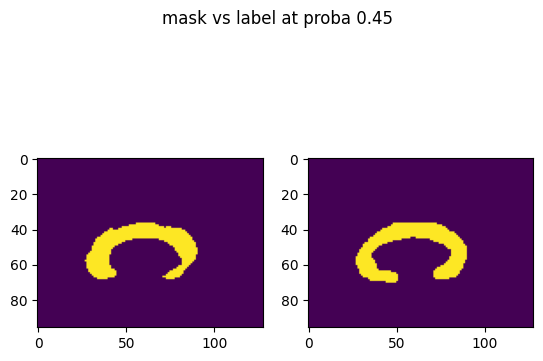

Dice score of DWI segmentation model = 0.979
              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99   1014453
         1.0       0.77      0.84      0.80     54603

    accuracy                           0.98   1069056
   macro avg       0.88      0.91      0.90   1069056
weighted avg       0.98      0.98      0.98   1069056



In [56]:
mask = make_mask(vol=preds, proba = 0.45)
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle(f"mask vs label at proba {0.45}")
ax1.imshow(mask[20])
ax2.imshow(labs[20])
plt.show()
print(f"Dice score of DWI segmentation model = {dice(mask, labs):.3f}")
print(report(mask, labs))

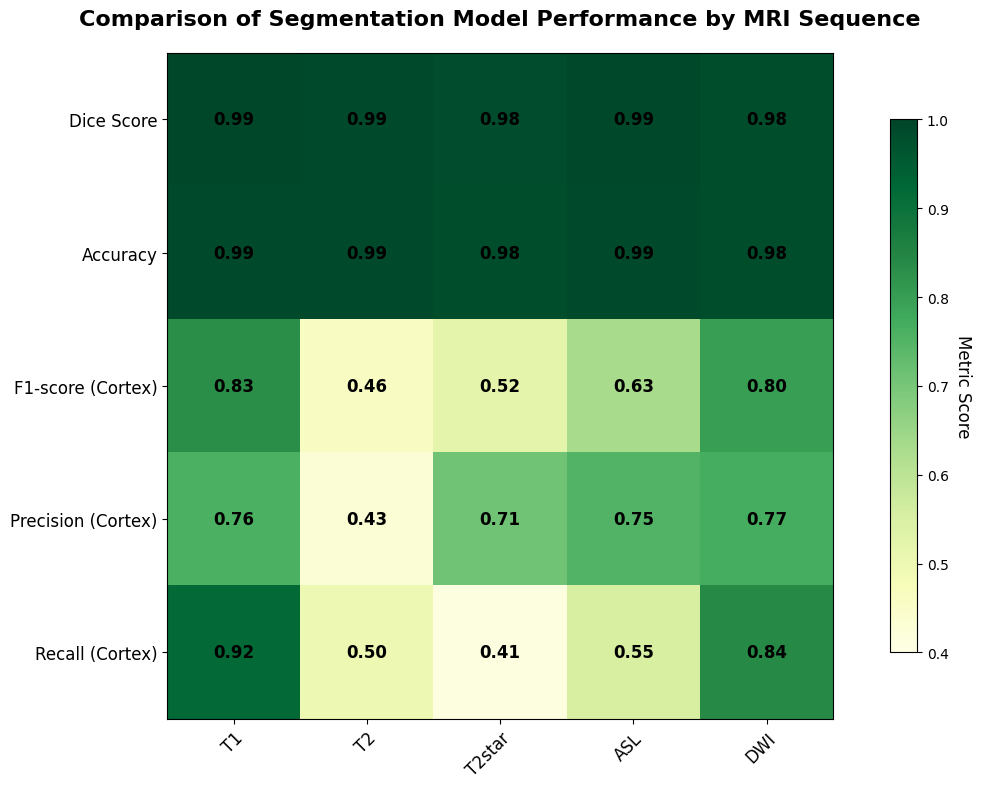

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# --- Data Preparation ---
# Store the classification results in a dictionary.
results_data = {
    'T1': {
        'Dice Score': 0.993,
        'Accuracy': 0.99,
        'Precision (Cortex)': 0.76,
        'Recall (Cortex)': 0.92,
        'F1-score (Cortex)': 0.83
    },
    'T2': {
        'Dice Score': 0.989,
        'Accuracy': 0.99,
        'Precision (Cortex)': 0.43,
        'Recall (Cortex)': 0.50,
        'F1-score (Cortex)': 0.46
    },
    'T2star': {
        'Dice Score': 0.982,
        'Accuracy': 0.98,
        'Precision (Cortex)': 0.71,
        'Recall (Cortex)': 0.41,
        'F1-score (Cortex)': 0.52
    },
    'ASL': {
        'Dice Score': 0.992,
        'Accuracy': 0.99,
        'Precision (Cortex)': 0.75,
        'Recall (Cortex)': 0.55,
        'F1-score (Cortex)': 0.63
    },
    'DWI': {
        'Dice Score': 0.979,
        'Accuracy': 0.98,
        'Precision (Cortex)': 0.77,
        'Recall (Cortex)': 0.84,
        'F1-score (Cortex)': 0.80
    }
}

# Define the order of models and metrics for plotting
model_names = ['T1', 'T2', 'T2star', 'ASL', 'DWI']
metric_names = ['Dice Score', 'Accuracy', 'F1-score (Cortex)', 'Precision (Cortex)', 'Recall (Cortex)']

# Create a 2D array of the data for the heatmap
# Rows correspond to metrics, columns correspond to models
data_array = np.array([[results_data[model][metric] for model in model_names] for metric in metric_names])


# --- Visualization ---
# Create a single figure and axes for the heatmap
fig, ax = plt.subplots(figsize=(12, 8))

# Define the colormap and the normalization range
cmap = 'YlGn'
vmin = 0.40  # Set a minimum value for the color scale to highlight differences
vmax = 1.00  # Maximum value is 1.0

# Create the heatmap using imshow
im = ax.imshow(data_array, cmap=cmap, vmin=vmin, vmax=vmax)

# --- Annotation and Labels ---
# Set the ticks and labels for the x-axis (Models) and y-axis (Metrics)
ax.set_xticks(np.arange(len(model_names)))
ax.set_yticks(np.arange(len(metric_names)))
ax.set_xticklabels(model_names, fontsize=12)
ax.set_yticklabels(metric_names, fontsize=12)

# Rotate the x-axis labels for better readability if needed
plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
for i in range(len(metric_names)):
    for j in range(len(model_names)):
        value = data_array[i, j]
        # Determine text color based on the background color for better contrast
        text_color = 'black'
        ax.text(j, i, f'{value:.2f}', ha="center", va="center", color=text_color, fontsize=12, fontweight='bold')

# --- Final Touches ---
# Add a title to the plot
ax.set_title('Comparison of Segmentation Model Performance by MRI Sequence', fontsize=16, fontweight='bold', pad=20)

# Create a colorbar and set its label
cbar = ax.figure.colorbar(im, ax=ax, shrink=0.8)
cbar.ax.set_ylabel('Metric Score', rotation=-90, va="bottom", fontsize=12)

# Adjust layout to prevent labels from being cut off
fig.tight_layout()

# Display the plot
plt.show()